### Morphological Transformations
We will learn different morphological operations like Erosion, Dilation, Opening, Closing etc.

We will see different functions like : cv.erode(), cv.dilate(), cv.morphologyEx() etc.

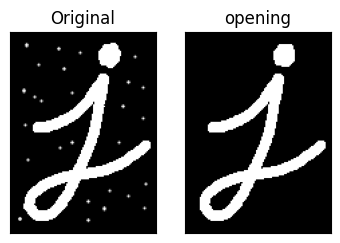

In [8]:
# It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation.

# Erosion
# erodes away the boundaries of foreground object

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('img.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)
dilation = cv.dilate(img,kernel,iterations = 1)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(erosion,cmap = 'gray')
plt.title('Dilation'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(dilation,cmap = 'gray')
plt.title('dilation'), plt.xticks([]), plt.yticks([])
plt.show()


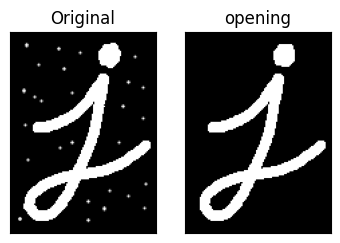

In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('img_noize.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(opening,cmap = 'gray')
plt.title('opening'), plt.xticks([]), plt.yticks([])
plt.show()






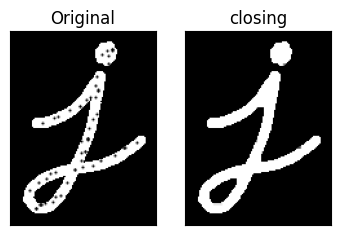

In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('img_inner_noize.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(closing,cmap = 'gray')
plt.title('closing'), plt.xticks([]), plt.yticks([])
plt.show()

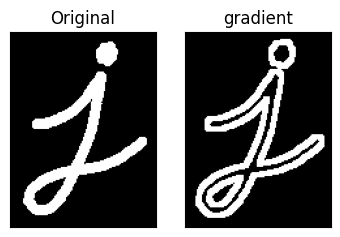

In [11]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('img.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.uint8)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(gradient,cmap = 'gray')
plt.title('gradient'), plt.xticks([]), plt.yticks([])
plt.show()

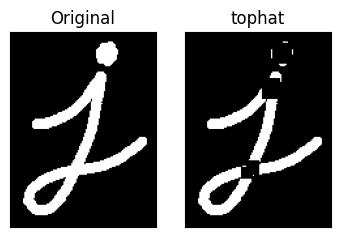

In [15]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('img.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((9,9),np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat,cmap = 'gray')
plt.title('tophat'), plt.xticks([]), plt.yticks([])
plt.show()

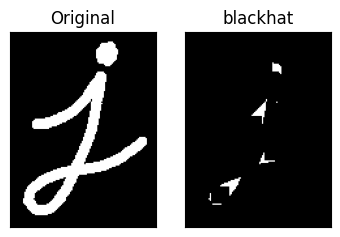

In [16]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('img.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((9,9),np.uint8)
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('blackhat'), plt.xticks([]), plt.yticks([])
plt.show()

Extract horizontal and vertical lines by using morphological operations

gray


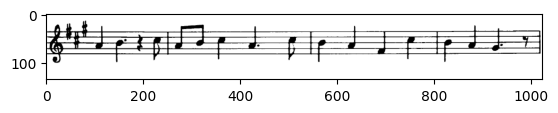

binary


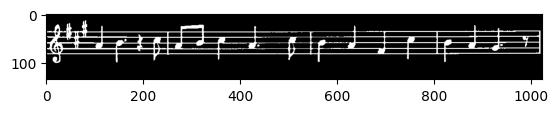

horizontal


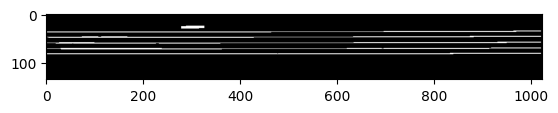

vertical


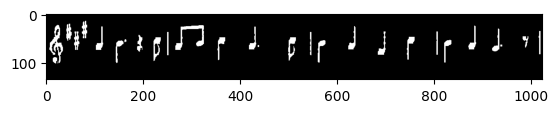

vertical_bit


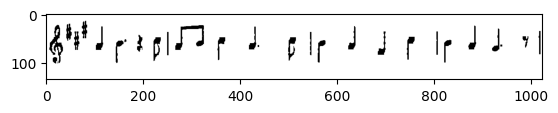

edges


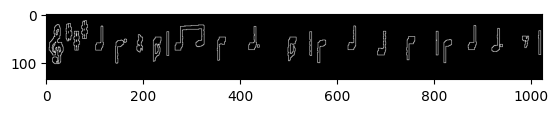

dilate


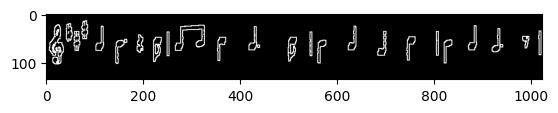

smooth - final


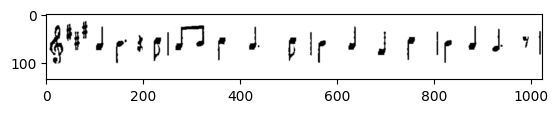

In [2]:
"""
@file morph_lines_detection.py
@brief Use morphology transformations for extracting horizontal and vertical lines sample code
"""
import numpy as np
import sys
import cv2 as cv
from matplotlib import pyplot as plt

def show_wait_destroy(winname, img):
    print(winname)
    plt.imshow(img, cmap = 'gray')
    plt.show()


# Load the image
src = cv.imread("img_1.png", cv.IMREAD_COLOR)

# Show source image
cv.imshow("src", src)
# [load_image]

# [gray]
# Transform source image to gray if it is not already
if len(src.shape) != 2:
    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
else:
    gray = src

# Show gray image
show_wait_destroy("gray", gray)
# [gray]

# [bin]
# Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
gray = cv.bitwise_not(gray)
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                            cv.THRESH_BINARY, 15, -2)
# Show binary image
show_wait_destroy("binary", bw)
# [bin]

# [init]
# Create the images that will use to extract the horizontal and vertical lines
horizontal = np.copy(bw)
vertical = np.copy(bw)
# [init]

# [horiz]
# Specify size on horizontal axis
cols = horizontal.shape[1]
horizontal_size = cols // 30

# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))

# Apply morphology operations
horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)

# Show extracted horizontal lines
show_wait_destroy("horizontal", horizontal)
# [horiz]

# [vert]
# Specify size on vertical axis
rows = vertical.shape[0]
verticalsize = rows // 30

# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))

# Apply morphology operations
vertical = cv.erode(vertical, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)

# Show extracted vertical lines
show_wait_destroy("vertical", vertical)
# [vert]

# [smooth]
# Inverse vertical image
vertical = cv.bitwise_not(vertical)
show_wait_destroy("vertical_bit", vertical)

'''
Extract edges and smooth image according to the logic
1. extract edges
2. dilate(edges)
3. src.copyTo(smooth)
4. blur smooth img
5. smooth.copyTo(src, edges)
'''

# Step 1
edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                            cv.THRESH_BINARY, 3, -2)
show_wait_destroy("edges", edges)

# Step 2
kernel = np.ones((2, 2), np.uint8)
edges = cv.dilate(edges, kernel)
show_wait_destroy("dilate", edges)

# Step 3
smooth = np.copy(vertical)

# Step 4
smooth = cv.blur(smooth, (2, 2))

# Step 5
(rows, cols) = np.where(edges != 0)
vertical[rows, cols] = smooth[rows, cols]

# Show final result
show_wait_destroy("smooth - final", vertical)
# [smooth]

### Exploring Optical Character Recognition (OCR): An Experiment with OpenCV and PyTesseract

In [1]:
from PIL import Image
from pytesseract import pytesseract

image = Image.open('ocr.png')
image = image.resize((400,200))
image.save('resized_image.png') # optional

text = pytesseract.image_to_string(image)
#print the text
print('detected text : ',text)


detected text :  Noisy,image
to test
Tesseract OCR



Step 3: Detecting and Extracting Text from Color Images

threshold


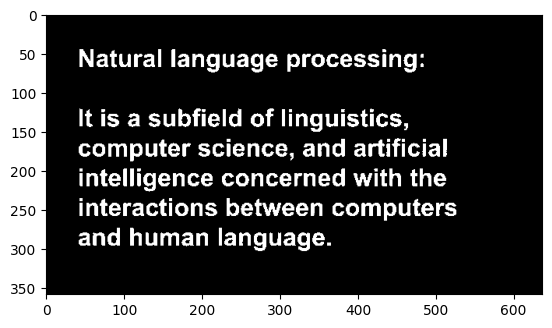

dilation


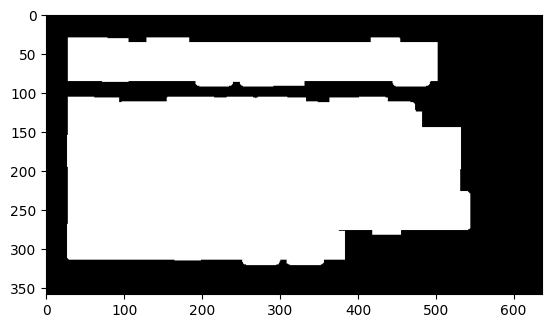

It is a subfield of linguistics,
computer science, and artificial
intelligence concerned with the
interactions between computers
and human language.


Natural language processing:




In [15]:
import cv2
from pytesseract import pytesseract
from matplotlib import pyplot as plt
img = cv2.imread("img_color.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU |
                                          cv2.THRESH_BINARY_INV)

print("threshold")
plt.imshow(thresh1, cmap = 'gray')
plt.show()


rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (12, 12))
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 3)

print("dilation")
plt.imshow(dilation, cmap = 'gray')
plt.show()
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

im2 = img.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    # Draw the bounding box on the text area
    rect=cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Crop the bounding box area
    cropped = im2[y:y + h, x:x + w]

    # cv2.imwrite('rectanglebox.jpg',rect) #optional

    # plt.imshow(rect, cmap = 'gray')
    # plt.show()

    # Using tesseract on the cropped image area to get text
    text = pytesseract.image_to_string(cropped)
    print(text)



